# Getting started - Requirements
Python (🐍):  This assumes that you have a python environment installed. If you haven't, we recommend installing [Anaconda](https://docs.anaconda.com/anaconda/install/).

FPsim (♀️): This tutorial uses [FPsim v2.0](https://github.com/fpsim/fpsim/tree/rc2.0-methodtime) (still under development). 

To install, you first need to clone or download the a copy of the source code from https://github.com/starsimhub/typhoidsim
 
```
git clone -b rc2.0-methodtime --single-branch https://github.com/fpsim/fpsim.git
cd fpsim
pip install -e .
```

If it worked, you should be able to import typhoidsim with `import fpsim as fp`.

## Interventions - how to select a specific subpopulation (eligibilty)?

At this point, you should now be able to run multiple simulations with distinct interventions, using default or custom parameters and plot the results. So far we've seen interventions that target a model parameter. Now we will see how we can we specify a function that tells FPsim who will receive the intervention. In particular, we will update the state value (e.g., intent_to_use) of all eligible women. 


### Change the intent to use contraception of some women

In [3]:
import fpsim as fp
import sciris as sc
import matplotlib.pyplot as plt

In [4]:
pars = dict(
    n_agents   = 1_000,
    location   = 'kenya',
    start_year = 2000, 
    end_year   = 2012,
    exposure_factor = 1.0  # Overall scale factor on probability of becoming pregnant
)


We now define who will have their intent changed  

In [5]:
def eligibility_criteria(sim):
    """ Select women aged 18 <= age < 25 who currently do not have intent to use contraception"""
    min_age = 18
    max_age = 25
    is_eligible = ((sim.people.is_female) &
                   (sim.people.age >= min_age) &
                   (sim.people.age < max_age) &
                   (sim.people.intent_to_use == False))
    return is_eligible

In [6]:
# This intervention will set the intent of eligible women to True in the year 2005
change_intent = fp.change_people_state('intent_to_use', eligibility=eligibility_criteria, year=2005.0, new_val=True)

In [7]:
s1 = fp.Sim(pars=pars, label='Baseline')
s2 = fp.Sim(pars=pars, interventions=change_intent, label='Increased intent')
simlist = sc.autolist([s1, s2])
msim = fp.MultiSim(sims=simlist)
msim.run(serial=True)

  Running "Baseline": 2000 of 2012 ( 0/145) (0.05 s)  ———————————————————— 1%
  Running "Baseline": 2001 of 2012 (12/145) (0.09 s)  •——————————————————— 9%
  Running "Baseline": 2002 of 2012 (24/145) (0.15 s)  •••————————————————— 17%
  Running "Baseline": 2003 of 2012 (36/145) (0.20 s)  •••••——————————————— 26%
  Running "Baseline": 2004 of 2012 (48/145) (0.25 s)  ••••••—————————————— 34%
  Running "Baseline": 2005 of 2012 (60/145) (0.31 s)  ••••••••———————————— 42%
  Running "Baseline": 2006 of 2012 (72/145) (0.38 s)  ••••••••••—————————— 50%
  Running "Baseline": 2007 of 2012 (84/145) (0.44 s)  •••••••••••————————— 59%
  Running "Baseline": 2008 of 2012 (96/145) (0.50 s)  •••••••••••••——————— 67%
  Running "Baseline": 2009 of 2012 (108/145) (0.57 s)  •••••••••••••••————— 75%
  Running "Baseline": 2010 of 2012 (120/145) (0.63 s)  ••••••••••••••••———— 83%
  Running "Baseline": 2011 of 2012 (132/145) (0.69 s)  ••••••••••••••••••—— 92%
  Running "Baseline": 2012 of 2012 (144/145) (0.75 

[<class 'fpsim.sim.MultiSim'>, <class 'sciris.sc_printing.prettyobj'>]
————————————————————————————————————————————————————————————————————————
Methods:
  compute_stats()         plot_age_first_birth()  split()                 
  merge()                 remerge()               to_df()                 
  plot()                  run()                   
————————————————————————————————————————————————————————————————————————
already_run: True
   base_sim: Sim("Baseline"; n=1000; 2000-2012; results: b=301 ☠=91
             pop=1193)
    created: datetime.datetime(2024, 9, 22, 19, 14, 31, 99484)
   git_info: {'branch': 'rc2.0-tuts-community-day', 'hash': 'ec879dc',
             'date': '20 [...]
      label: 'Baseline'
    results: #0. 't':
             array([2000.        , 2000.08333333, 2000.16666667,
             2000.25  [...]
   run_args: {}
       sims: [Sim("Baseline"; n=1000; 2000-2012; results: b=301 ☠=91
             pop=1193), Si [...]
    version: '2.0.0-dev'
      which: None

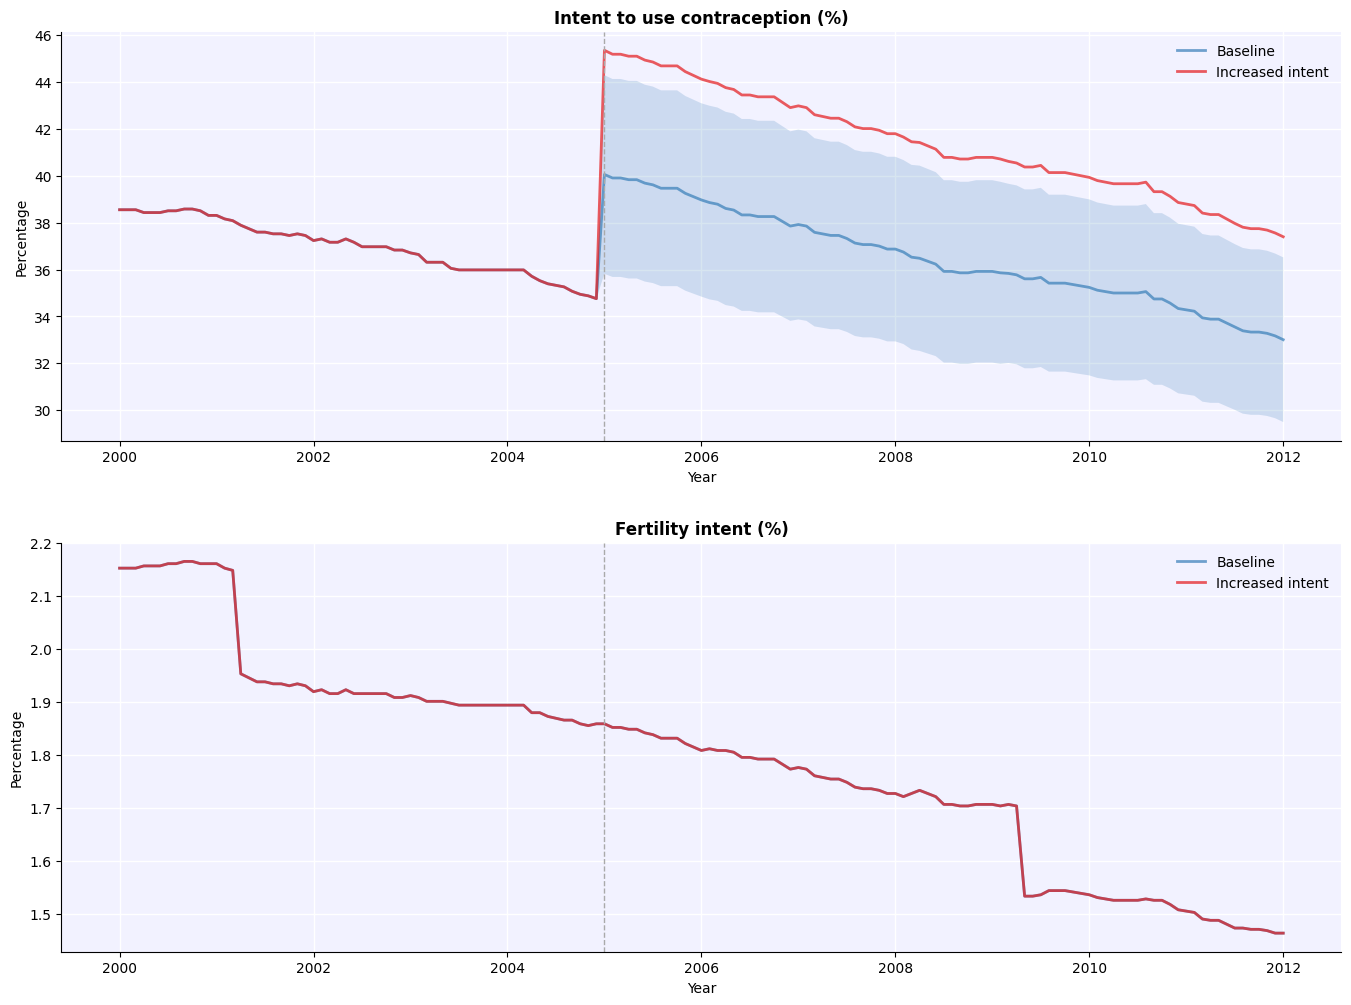

In [8]:
msim.plot(to_plot='intent');

### Increase the number of women who have paid work

The same intervention can be used to change other 'states' or attributes of women. Let's see how we could increase the number of women who have paid work. 

In [9]:
def select_unemployed(sim):
    """ Select women aged 15 <= age < 50 who currently do not have paid work"""
    min_age = 20
    max_age = 25
    is_eligible = ((sim.people.is_female) &
                   (sim.people.age >= min_age) &
                   (sim.people.age < max_age) &
                   (sim.people.paid_employment == False))
    return is_eligible

In [10]:
empwr = fp.Empowerment()
s3 = fp.Sim(pars=pars, empowerment_module=empwr, label='Baseline')

In [11]:
change_employment = fp.change_people_state('paid_employment', eligibility=select_unemployed, year=2010.0, new_val=True)
empwr = fp.Empowerment()
s4 = fp.Sim(pars=pars, 
            empowerment_module=empwr, 
            interventions=change_employment, label='Increased employment')

In [12]:
s3.run()
s4.run()

  Running "Baseline": 2000 of 2012 ( 0/145) (0.06 s)  ———————————————————— 1%
  Running "Baseline": 2001 of 2012 (12/145) (0.13 s)  •——————————————————— 9%
  Running "Baseline": 2002 of 2012 (24/145) (0.21 s)  •••————————————————— 17%
  Running "Baseline": 2003 of 2012 (36/145) (0.30 s)  •••••——————————————— 26%
  Running "Baseline": 2004 of 2012 (48/145) (0.39 s)  ••••••—————————————— 34%
  Running "Baseline": 2005 of 2012 (60/145) (0.48 s)  ••••••••———————————— 42%
  Running "Baseline": 2006 of 2012 (72/145) (0.58 s)  ••••••••••—————————— 50%
  Running "Baseline": 2007 of 2012 (84/145) (0.68 s)  •••••••••••————————— 59%
  Running "Baseline": 2008 of 2012 (96/145) (0.77 s)  •••••••••••••——————— 67%
  Running "Baseline": 2009 of 2012 (108/145) (0.86 s)  •••••••••••••••————— 75%
  Running "Baseline": 2010 of 2012 (120/145) (0.95 s)  ••••••••••••••••———— 83%
  Running "Baseline": 2011 of 2012 (132/145) (1.05 s)  ••••••••••••••••••—— 92%
  Running "Baseline": 2012 of 2012 (144/145) (1.15 

Sim("Increased employment"; n=1000; 2000-2012; results: b=317 ☠=90 pop=1213)

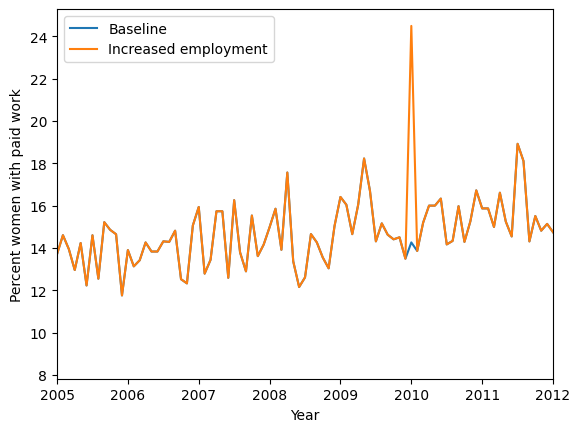

In [13]:
plt.plot(s3.results.t, s3.results.paid_employment, label=s3.label)
plt.plot(s4.results.t, s4.results.paid_employment, label=s4.label)
plt.xlim([2005, 2012])
plt.ylabel('Percent women with paid work')
plt.xlabel('Year')
plt.legend()